<a href="https://colab.research.google.com/github/claredavies/ArtificialIntelligience/blob/main/ComputationalIntelligienceAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [392]:
import numpy
import pandas as pd
import random
import matplotlib.pyplot as plt

In [393]:
from numpy.random import randint
from numpy.random import rand

# Inputs

Choose easy, medium or hard

In [394]:

level = "hard"

#for intial_population_size = 20, num_generations needs to be around 500-1000  to solve
if(level=="easy"):
  class_series = pd.Series(['Class1', 'Class1', 'Class1','Class2', 'Class2', 'Class2', 'Class2'])
  subject_series = pd.Series(['Maths', 'English', 'Chemistry','Maths', 'English', 'History', 'Physics'])
  hours_series = pd.Series([5, 3, 2, 1, 4, 4, 5])
  daysOfWeek = ['Mon','Tue','Wed', 'Thur']
  teacher_series = pd.Series(['Prof. Melih', 'Prof. Melih', 'Prof. Clare', 'Prof. Clare','Prof. Clare'])
  subject_series_prof = pd.Series(['English', 'Chemistry', 'History','Maths', 'Physics'])

#for intial_population_size = 20, num_generations needs to be around 700-3000  to solve
elif(level=="medium"):
  class_series = pd.Series(['Class1', 'Class1', 'Class1', 'Class1','Class2', 'Class2', 'Class2', 'Class2','Class3','Class3'])
  subject_series = pd.Series(['Maths', 'English', 'Chemistry', 'History','Maths', 'English', 'History', 'Physics','Maths', 'Physics'])
  hours_series = pd.Series([3, 4, 5, 3, 4, 4, 5, 3, 3, 4])
  daysOfWeek = ['Mon','Tue','Wed', 'Thur']
  teacher_series = pd.Series(['Prof. Melih', 'Prof. Melih', 'Prof. Clare', 'Prof. Clare','Prof. Marti', 'Prof. Marti'])
  subject_series_prof = pd.Series(['Maths', 'English', 'Chemistry', 'History','Maths', 'Physics'])

#for intial_population_size = 20, num_generations needs to be around 2000-10000  to solve
elif(level=="hard"):
  class_series = pd.Series(['Class1', 'Class1', 'Class1', 'Class1','Class2', 'Class2', 'Class2', 'Class2','Class3','Class3','Class3','Class3','Class4','Class4','Class4','Class4'])
  subject_series = pd.Series(['Dynamic Prog.', 'Deep Learning', 'Rocket Science', 'Data Science','Dynamic Prog.', 'Deep Learning', 'Data Science', 'Embedded AI','Dynamic Prog.', 'Embedded AI','Dynamic Prog.', 'Deep Learning', 'Rocket Science','Data Science', 'Embedded AI','Dynamic Prog.'])
  hours_series = pd.Series([4, 4, 5, 3, 4, 4, 5, 4, 3, 4, 4, 4, 2, 4, 5, 3])
  daysOfWeek = ['Mon','Tue','Wed', 'Thur','Fri']
  teacher_series = pd.Series(['Prof. Melih', 'Prof. Hugo', 'Prof. Clare', 'Prof. Clare','Prof. Marti', 'Prof. Angela','Prof. Marti'])
  subject_series_prof = pd.Series(['Dynamic Prog.', 'Deep Learning', 'Rocket Science', 'Data Science','Dynamic Prog.', 'Embedded AI','Deep Learning'])

#impossible to solve
elif(level=="insane"):
  class_series = pd.Series(['Class1', 'Class1', 'Class1', 'Class1','Class2', 'Class2', 'Class2', 'Class2','Class3','Class3','Class3','Class3','Class4','Class4','Class4','Class4','Class5','Class5','Class5','Class5'])
  subject_series = pd.Series(['Dynamic Prog.', 'Deep Learning', 'Rocket Science', 'Data Science','Dynamic Prog.', 'Deep Learning', 'Data Science', 'Embedded AI','Dynamic Prog.', 'Embedded AI','Dynamic Prog.', 'Deep Learning', 'Rocket Science','Data Science', 'Embedded AI','Dynamic Prog.','Deep Learning', 'Data Science', 'Embedded AI','Dynamic Prog.'])
  hours_series = pd.Series([4, 5, 5, 4, 4, 4, 5, 5, 3, 4, 5, 4, 2, 4, 5, 6, 5, 4, 4, 4])
  daysOfWeek = ['Mon','Tue','Wed', 'Thur','Fri']
  teacher_series = pd.Series(['Prof. Melih', 'Prof. Melih', 'Prof. Clare', 'Prof. Clare','Prof. Marti', 'Prof. Marti','Prof. Marti'])
  subject_series_prof = pd.Series(['Dynamic Prog.', 'Deep Learning', 'Rocket Science', 'Data Science','Dynamic Prog.', 'Embedded AI','Deep Learning'])



Class Info

In [395]:
#Creating Dictionary
frame = { 'Class': class_series, 'Subject': subject_series, 'Hours': hours_series }

#Creating Dataframe
class_subject_hours_dataframe = pd.DataFrame(frame)

#Printing dataframe
print(class_subject_hours_dataframe)

     Class         Subject  Hours
0   Class1   Dynamic Prog.      4
1   Class1   Deep Learning      4
2   Class1  Rocket Science      5
3   Class1    Data Science      3
4   Class2   Dynamic Prog.      4
5   Class2   Deep Learning      4
6   Class2    Data Science      5
7   Class2     Embedded AI      4
8   Class3   Dynamic Prog.      3
9   Class3     Embedded AI      4
10  Class3   Dynamic Prog.      4
11  Class3   Deep Learning      4
12  Class4  Rocket Science      2
13  Class4    Data Science      4
14  Class4     Embedded AI      5
15  Class4   Dynamic Prog.      3


Define Timetable

In [396]:
startTime = 10
durationLesson = 1
lunchTime = 12
durationLunch = 1
endTime = 15

singleTimetable = []

for day in daysOfWeek:
  for time in range(startTime, endTime, durationLesson):
    if time != lunchTime:
      singleTimetable.append([day, time])

print(singleTimetable)

[['Mon', 10], ['Mon', 11], ['Mon', 13], ['Mon', 14], ['Tue', 10], ['Tue', 11], ['Tue', 13], ['Tue', 14], ['Wed', 10], ['Wed', 11], ['Wed', 13], ['Wed', 14], ['Thur', 10], ['Thur', 11], ['Thur', 13], ['Thur', 14], ['Fri', 10], ['Fri', 11], ['Fri', 13], ['Fri', 14]]


Teacher Info

In [397]:
#Creating Dictionary
frame = { 'Teacher': teacher_series, 'Subject': subject_series_prof}

#Creating Dataframe
teacher_subject_dataframe = pd.DataFrame(frame)

teacher_subject_array = teacher_subject_dataframe.to_numpy()
#Printing dataframe
print(teacher_subject_array)

# dictionary generated for convenience

# random availability list 
aval_list = [True for _ in range(len(singleTimetable))]
for i in range(len(singleTimetable)):
  pass
  # Marti - This is potentially a really bad idea xd  
  #aval_list.append(random.choice([True,False]))


teachers_dict = dict((t, {
                        'Avaliability' : aval_list,  # Maybe is just enought with the number of hours assignable per day
                        'Subjects'      : teacher_subject_dataframe.groupby('Teacher').get_group(str(t))['Subject'].tolist()
                        }
                    ) for t in teacher_subject_dataframe.Teacher.unique())

print(teachers_dict)

[['Prof. Melih' 'Dynamic Prog.']
 ['Prof. Hugo' 'Deep Learning']
 ['Prof. Clare' 'Rocket Science']
 ['Prof. Clare' 'Data Science']
 ['Prof. Marti' 'Dynamic Prog.']
 ['Prof. Angela' 'Embedded AI']
 ['Prof. Marti' 'Deep Learning']]
{'Prof. Melih': {'Avaliability': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], 'Subjects': ['Dynamic Prog.']}, 'Prof. Hugo': {'Avaliability': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], 'Subjects': ['Deep Learning']}, 'Prof. Clare': {'Avaliability': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], 'Subjects': ['Rocket Science', 'Data Science']}, 'Prof. Marti': {'Avaliability': [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True], 'Subjects': ['Dynamic Prog.', 'Deep Learn

In [398]:
def create_timetables(class_subject_hours_dataframe, timetable) -> numpy.ndarray:
  """
    Generates an array of blank timetables ready to be assigned, will have one row for each different class and n
    columns depending of the slots avaliable per week 
  """ 
  all_timetables = []
  blank_timetable = [None] * len(timetable)
  number_class_timetables = class_subject_hours_dataframe.Class.nunique()  # (Class 1, Class 2, ...)

  for x in range(number_class_timetables):
    all_timetables.append(blank_timetable)

  # print(all_timetables)
  all_timetables_array = numpy.array(all_timetables)
  return all_timetables_array

In [399]:
def make_array_1_hour_class(class_mask):
  """
  Generates a list with the subject names for convenience

  if the mask is

          Class    Subject  Hours
    0  Class1      Maths      3
    1  Class1    English      4
    2  Class1  Chemistry      5
    3  Class1    History      3
  
  The output will be

  ['Maths', 'Maths', 'Maths', 'English', 'English', 'English', 'English', 'Chemistry', 'Chemistry', 'Chemistry', 'Chemistry', 'Chemistry', 'History', 'History', 'History']
  """
  list_classes_1hr = []
  for index, row in class_mask.iterrows():
    number_hours_per_class = row['Hours']
    for x in range(number_hours_per_class):
      list_classes_1hr.append(row['Subject'])
  list_finished = list_classes_1hr.copy()
  return list_finished

def assign_teacher(subject:str, teacher_subject_dataframe):
  """ 
      Return a possible teacher name that teaches that subject, 
      in case of having more than one capable teacher, it will be
      selected randomly.

      TODO: Could be added a constrain of hours for each teacher
  """
  candidates = []
  for t in teacher_subject_dataframe.Teacher.unique():
    if subject in teachers_dict[t]['Subjects']:
      candidates.append(t)

  if len(candidates)==0:
    return 'Non-Possible-Assignation'
  elif len(candidates)==1:
    return candidates[0]
  else:
    return random.choice(candidates)

def reasignation_population(population, class_subject_hours_dataframe, teacher_subject_dataframe, timetable):
    """In case of having two populations been identical, we will regenerate the first one to appear in the list"""
    
    if len(population) == 1:  # we will not check in the case of only having one sample of population
        return population
    
    modified = population.copy() # This list will contain the population generated by the algorithm with the applyed changes
    
    for i in range(len(population)):
        for j in range(len(population)):  # checking each of the population samples
            if i == j:
                pass
            else:
                # is it worth to have this O(n²) just for checking identical pops? xd
                if((population[i] == population[j]).all()):
                    # we will delete one of the identicals and generate it again
                    # the probabilities of having the same output again should not be
                    # really high
                    print(" i = ", i, " j = ", j)
                    print("pop i -> \n", population[i], "\n")
                    print("pop j -> \n", population[j], "\n")
                    modified.remove(population[i])
                    update = generate_intial_population(class_subject_hours_dataframe, teacher_subject_dataframe, timetable, populationSize = 1)[0]
                    population[i]=update # update for not double check (this will not modify the original one)
                    modified.append(update)
                
    return modified


## Test duplication

In [400]:
#generate_intial_population(class_subject_hours_dataframe, teacher_subject_dataframe, timetable, populationSize)
#test = reasignation_population(,class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable)
#test[0] = test[1] # force duplication
#test
#reasignation_population(test, class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable)

# Genetic Algorithms Functions

In [401]:
def generate_intial_population(class_subject_hours_dataframe, teacher_subject_dataframe, timetable, populationSize):
  population = []
  class_names = class_subject_hours_dataframe.Class.unique()
  number_class_names = class_subject_hours_dataframe.Class.nunique()

  for a in range(populationSize):
    trackClass = 0
    all_timetables = create_timetables(class_subject_hours_dataframe, timetable)
    for class_name in class_names:
      mask = class_subject_hours_dataframe.loc[class_subject_hours_dataframe['Class'] == class_name]
      list_classes_1hr = make_array_1_hour_class(mask)

      list_indices_single_timetable = [None] * len(timetable)

      if(len(list_classes_1hr) > len(list_indices_single_timetable) ):
        print("Not enough hours in timetable for class hours set!!")
        return

      for i in range(len(list_indices_single_timetable)):
        list_indices_single_timetable[i] = i
    
      range_end_single_timetable = len(list_indices_single_timetable) - 1

      for j in range((len(list_classes_1hr) - 1)):
        random_num = random.randint(0, range_end_single_timetable)

        random_num_index_value = list_indices_single_timetable[random_num]

        all_timetables[trackClass][random_num_index_value] = (list_classes_1hr[j], assign_teacher(subject=list_classes_1hr[j], teacher_subject_dataframe=teacher_subject_dataframe))
    
        list_indices_single_timetable.pop(random_num)
        range_end_single_timetable = range_end_single_timetable - 1
    
      trackClass = trackClass + 1
    
    population.append(all_timetables)
    population = reasignation_population(population, class_subject_hours_dataframe, teacher_subject_dataframe, timetable)
  return population

In [402]:
# CHECK: We have to check as 2 different clashes if we have same subject the same hour
# or same profesor the same hour in different clases?

def calClashes(pop):
  num_timetable_slots = pop.shape[1]
  num_classes = pop.shape[0]
  clash = 0
  for i in range(num_timetable_slots):
    for j in range(0, num_classes):
      for t in range(j+1, num_classes):
      # Original function here
      # if(pop[(j-1)][i] == pop[j][i]):
      #   if(pop[(j-1)][i] != None):
      #    clash = clash + 1
        if(pop[(j)][i] != None) and (pop[(t)][i] != None):  # If we are not dealing with empty spaces
          if(pop[j][i] == pop[t][i]) or (pop[j][i][1] == pop[t][i][1]): # check if we have the same class at the same time or one teacher is assigned in two classes at the same time
              clash = clash + 1    
  for i in range(num_timetable_slots):
    for j in range( num_classes):
        if(pop[j][i] != None):
            # If that teacher is not avaliable at that time  
            if(not(teachers_dict[pop[j][i][1]]['Avaliability'][i])):
                clash = clash + 1
  return clash

In [403]:
def numOfBlockClass(schedules):
  """
  having the same subject from the same professor
  provides better fitness
  """
  numOfBlockClass = 0
  for i in range(len(schedules)):
    for j in range(len(schedules[i])-1):
      #If they are not none and they are exactly the same
      if schedules[i][j] and schedules[i][j+1] and (schedules[i][j] == schedules[i][j+1]):
        numOfBlockClass += 1
  return numOfBlockClass


In [404]:
def fitnessFunction(pop):
  """
  fitnessFunction will return a fitness list
  1. element: num of clashes
  2. element: num of block classes
  """
  arrPop = numpy.array(pop)
  num_representations = arrPop.shape[0]
  NoClashesList = [None] * num_representations
  numOfBlockClassList = [None] * num_representations

  # print("no representations:  " + str(num_representations))
  for i in range(num_representations):
    populationSelect = pop[i]
    noClashes = calClashes(populationSelect)
    NoClashesList[i] = noClashes
    noBlockClass = numOfBlockClass(populationSelect)
    numOfBlockClassList[i] = noBlockClass

  fitness = [] #fitness is a list 
  fitness.append(NoClashesList)
  fitness.append(numOfBlockClassList)
  return fitness

In [405]:
pop = generate_intial_population(class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable, 10)
fitnessFunction(pop)

[[9, 13, 12, 15, 14, 6, 17, 10, 13, 16], [6, 8, 6, 8, 4, 8, 4, 4, 9, 7]]

In [406]:
def recombine(parent1, parent2):
  parent1Array = numpy.array(parent1)
  parent2Array = numpy.array(parent2)

  recombinationResults = []

  noTimetables = parent2Array.shape[0]
  crossOverIndex = int(parent1Array.shape[1]/2)

  recombinedParent1Array = parent1Array.copy()
  recombinedParent2Array = parent2Array.copy()

  for i in range(noTimetables): 
    classRecombinationResults = []  
    parent1FirstHalf = parent1Array[i][0:(crossOverIndex-1)]
    parent1SecondHalf = parent1Array[i][(crossOverIndex-1):(parent1.shape[1])]
    parent2FirstHalf = parent2Array[i][0:(crossOverIndex-1)]
    parent2SecondHalf = parent2Array[i][(crossOverIndex-1):(parent2.shape[1])]

    indicesListNotMatching1stParent = []
    indicesListNotMatching2ndParent = []
    length2ndHalf = len(parent2SecondHalf)

    parent1OriginalSecondHalfCopy = parent1SecondHalf.copy()
    parent1ResultSecondHalf = parent2SecondHalf.copy()

    parent2OriginalSecondHalfCopy = parent2SecondHalf.copy()
    parent2ResultSecondHalf = parent1SecondHalf.copy()

    for j in range(length2ndHalf):
      if parent1ResultSecondHalf[j] not in parent1OriginalSecondHalfCopy:
        indicesListNotMatching1stParent.append(j)
      else:
        resultParent1 = numpy.where(parent1OriginalSecondHalfCopy == parent1ResultSecondHalf[j])
        parent1OriginalSecondHalfCopy = numpy.delete(parent1OriginalSecondHalfCopy, resultParent1[0][0])

    for k in range(len(parent1OriginalSecondHalfCopy)):
      parent1ResultSecondHalf[indicesListNotMatching1stParent[k]] = parent1OriginalSecondHalfCopy[k]

    for l in range(length2ndHalf):
      if parent2ResultSecondHalf[l] not in parent2OriginalSecondHalfCopy:
        indicesListNotMatching2ndParent.append(l)
      else:
        resultParent2 = numpy.where(parent2OriginalSecondHalfCopy == parent2ResultSecondHalf[l])
        parent2OriginalSecondHalfCopy = numpy.delete(parent2OriginalSecondHalfCopy, resultParent2[0][0])

    for m in range(len(parent2OriginalSecondHalfCopy)):
      parent2ResultSecondHalf[indicesListNotMatching2ndParent[m]] = parent2OriginalSecondHalfCopy[m]

    recombinedParent1 = numpy.concatenate((parent1FirstHalf, parent1ResultSecondHalf))
    recombinedParent2 = numpy.concatenate((parent2FirstHalf, parent2ResultSecondHalf))

    recombinedParent1Array[i] = recombinedParent1
    recombinedParent2Array[i] = recombinedParent2

  recombinationResults.append(recombinedParent1Array)
  recombinationResults.append(recombinedParent2Array)

  return recombinationResults

In [407]:
def mutation(recombinationResults, force = False):
  """ 
      Input :  TWO PARENTS POP
  
      Output:  TWO PARENTS WITH MUTATIONS APPLIED
  """
    
  randGen = random.randint(0, 5)
  numberMutationsWanted = 3
  prob = 25
  if randGen > 3 or force:
    #print("Mutation")
    for i in range(numberMutationsWanted):

      for i in range(len(recombinationResults[0])):

        randStartInd = random.randint(0, len(recombinationResults[0][0])-1)
        randEndInd = random.randint(0, len(recombinationResults[0][0])-1)

        # print("Start mutation at:  " + str(randStartInd))
        # print("End mutation at:  " + str(randEndInd))

        startIndexValueParent1 = recombinationResults[0][i][randStartInd]
        
        # In the % of cases the professor could be changed for other capable of teaching
        if random.random() < prob / 100. and startIndexValueParent1!= None:
            #print("Teacher mutation!")
            t = assign_teacher(startIndexValueParent1[0], teacher_subject_dataframe)
            startIndexValueParent1 = (startIndexValueParent1[0],t)
        else:
          #class swap mutation
          startIndexValueParent1
        
        recombinationResults[0][i][randStartInd] = recombinationResults[0][i][randEndInd]
        recombinationResults[0][i][randEndInd] = startIndexValueParent1
        
        randStartInd = random.randint(0, len(recombinationResults[0][0])-1)
        randEndInd = random.randint(0, len(recombinationResults[0][0])-1)
        
        startIndexValueParent2 = recombinationResults[1][i][randStartInd]
        
        # In the % of cases the professor could be changed for other capable of teaching
        if random.random() < prob / 100. and startIndexValueParent2!= None:
            #print("Teacher mutation!")
            t = assign_teacher(startIndexValueParent2[0], teacher_subject_dataframe)
            startIndexValueParent2 = (startIndexValueParent2[0],t)

        
        recombinationResults[1][i][randStartInd] = recombinationResults[1][i][randEndInd]
        #recombinationResults[1][i][randEndInd] = recombinationResults[1][i][randStartInd]
        recombinationResults[1][i][randEndInd] = startIndexValueParent2

        
  #else:
    #print("No mutation")

  return recombinationResults

In [408]:
# mutation(recombine(output, output),force=True)

#topandas_schedule(output)

In [409]:
def evolutionary_algo(class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable, intialPopultationSize, num_max_generations,printValues = True):
  population = generate_intial_population(class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable, intialPopultationSize)
  count = 0
  generation = 0
  min_value_clash = 1000
  max_value_block = 0
  offset = 500 # it is to optimize more even after reaching 0 clash
  zeroClash = False
  while (generation!= num_max_generations) and (not zeroClash or offset != 0):
    generation += 1
    fitness = fitnessFunction(population)

    min_value = min(fitness[0])
    # create index list with the min clash values
    # among them choose the one with max num of block classes
    min_indexes = [i for i,x in enumerate(fitness[0]) if x == min_value]
    max_value = 0
    for i in min_indexes:
      max_value = max(fitness[1][i],max_value) #want to maximize num of block classes
    min_index = fitness[1].index(max_value)
    
    fitnessWithoutMin = fitness[0].copy()
    fitnessWithoutMin[min_index] = 1000
    second_min_value = min(fitnessWithoutMin)
    
    min_indexes = [i for i,x in enumerate(fitness[0]) if x == second_min_value]
    max_value = 0
    for i in min_indexes:
      max_value = max(fitness[1][i],max_value) #want to maximize num of block classes
    second_min_index = fitness[1].index(max_value)

    firstParent = population[min_index]
    secondParent =  population[second_min_index]

    # print("Parent 1:  " + str(firstParent))
    # print("Parent 2:  " + str(secondParent))

    recombinationParentResults = recombine(firstParent, secondParent)
    # print("Recombination results:  " + str(recombinationParentResults))

    recombinationParentResultsMutation = mutation(recombinationParentResults)
    # print("Mutation results:  " + str(recombinationParentResultsMutation))

    # make up new population
    population = []
    population.append(firstParent)
    population.append(secondParent)
    population.append(recombinationParentResults[0])
    population.append(recombinationParentResults[1])
    # print("Population going in:  " + str(population))

    # The best result in the current iteration.
    fitness = fitnessFunction(population)
    min_value_clash = min(fitness[0])
    min_indexes = [i for i,x in enumerate(fitness[0]) if x == min_value_clash]
    max_value_block = 0
    for i in min_indexes:
      max_value_block = max(fitness[1][i],max_value_block) #want to maximize num of block classes
    min_index = fitness[1].index(max_value_block)
    if printValues:
      if(count % 50== 0):#for each 50 gen.
        print("Number of clashes:  " + str(min_value_clash) + " --- Number of block courses:  " + str(max_value_block))
    count += 1
    if (min_value_clash == 0):
      zeroClash = True
      offset -= 1
  if printValues:
    print("Number of clashes:  " + str(min_value_clash) + " --- Number of block courses:  " + str(max_value_block)) #to print the last one
    print("Number of generations to reach optimal solution: " + str(generation-offset))
    print("Best result : ")
    topandas_schedule(population[min_index])
  return population[min_index], generation-offset

Better display of schedule

In [410]:
def topandas_schedule(output):
    """ Just a more human friendly way to read the output """
    
    #tables = [dict((d, [] ) for d in daysOfWeek) for _ in len(output)]
    # This loop is just for generating a visualizable output
    
    times = []
   
    for time in range(startTime, endTime, durationLesson):
        if time != lunchTime:
            times.append(time)
    out = []
   
    for _class in output:
        VisualizeTimetable = dict((d, [] ) for d in daysOfWeek)
        j = 0
        i = 0
        for c in _class:
            j+=1
            VisualizeTimetable[daysOfWeek[i]].append(c)
            if j != 0 and j%len(times)==0:
                i+=1
        VisualizeTimetableString = dict((d, []) for d in daysOfWeek)
        for d in daysOfWeek:
            for t in VisualizeTimetable[d]:
                VisualizeTimetableString[d].append(str(t))
        
        out.append( pd.DataFrame(VisualizeTimetableString, index=[str(e) for e in times]))

    for i in range(len(out)):
        print('Class ',  i+1)
        display(out[i])
    #return out

# Execution

In [413]:
intial_population_size = 20
num_max_generations = 20000

output, numGen = evolutionary_algo(class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable, intial_population_size, num_max_generations)

<ipython-input-406-17cbbe07284d>:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent1ResultSecondHalf[j] not in parent1OriginalSecondHalfCopy:
<ipython-input-406-17cbbe07284d>:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent2ResultSecondHalf[l] not in parent2OriginalSecondHalfCopy:


Number of clashes:  17 --- Number of block courses:  6
Number of clashes:  9 --- Number of block courses:  9
Number of clashes:  5 --- Number of block courses:  9
Number of clashes:  3 --- Number of block courses:  10
Number of clashes:  3 --- Number of block courses:  10
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of clashes:  3 --- Number of block courses:  11
Number of cl

,Mon,Tue,Wed,Thur,Fri
10,"('Data Science', 'Prof. Clare')",None,"('Data Science', 'Prof. Clare')","('Deep Learning', 'Prof. Marti')",None
11,"('Deep Learning', 'Prof. Hugo')",None,"('Dynamic Prog.', 'Prof. Melih')","('Rocket Science', 'Prof. Clare')","('Dynamic Prog.', 'Prof. Marti')"
13,"('Rocket Science', 'Prof. Clare')","('Deep Learning', 'Prof. Marti')","('Dynamic Prog.', 'Prof. Melih')","('Deep Learning', 'Prof. Hugo')","('Dynamic Prog.', 'Prof. Melih')"
14,"('Rocket Science', 'Prof. Clare')",None,"('Rocket Science', 'Prof. Clare')","('Rocket Science', 'Prof. Clare')",None


Class  2


,Mon,Tue,Wed,Thur,Fri
10,None,"('Data Science', 'Prof. Clare')","('Deep Learning', 'Prof. Hugo')","('Dynamic Prog.', 'Prof. Melih')","('Embedded AI', 'Prof. Angela')"
11,"('Dynamic Prog.', 'Prof. Melih')","('Data Science', 'Prof. Clare')",None,"('Embedded AI', 'Prof. Angela')","('Data Science', 'Prof. Clare')"
13,"('Dynamic Prog.', 'Prof. Melih')",None,"('Deep Learning', 'Prof. Marti')","('Dynamic Prog.', 'Prof. Melih')","('Deep Learning', 'Prof. Hugo')"
14,None,"('Data Science', 'Prof. Clare')","('Deep Learning', 'Prof. Marti')","('Embedded AI', 'Prof. Angela')","('Data Science', 'Prof. Clare')"


Class  3


,Mon,Tue,Wed,Thur,Fri
10,"('Dynamic Prog.', 'Prof. Melih')","('Dynamic Prog.', 'Prof. Melih')","('Dynamic Prog.', 'Prof. Melih')","('Embedded AI', 'Prof. Angela')","('Deep Learning', 'Prof. Marti')"
11,None,"('Embedded AI', 'Prof. Angela')",None,None,None
13,"('Deep Learning', 'Prof. Marti')","('Dynamic Prog.', 'Prof. Melih')","('Embedded AI', 'Prof. Angela')","('Embedded AI', 'Prof. Angela')",None
14,"('Deep Learning', 'Prof. Marti')","('Dynamic Prog.', 'Prof. Marti')","('Dynamic Prog.', 'Prof. Melih')","('Dynamic Prog.', 'Prof. Marti')",None


Class  4


,Mon,Tue,Wed,Thur,Fri
10,"('Embedded AI', 'Prof. Angela')","('Dynamic Prog.', 'Prof. Marti')",None,"('Data Science', 'Prof. Clare')","('Rocket Science', 'Prof. Clare')"
11,"('Rocket Science', 'Prof. Clare')",None,"('Data Science', 'Prof. Clare')",None,"('Embedded AI', 'Prof. Angela')"
13,"('Embedded AI', 'Prof. Angela')","('Data Science', 'Prof. Clare')","('Data Science', 'Prof. Clare')",None,"('Embedded AI', 'Prof. Angela')"
14,None,"('Embedded AI', 'Prof. Angela')",None,"('Dynamic Prog.', 'Prof. Melih')",None


# Visualization

<ipython-input-386-17cbbe07284d>:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent1ResultSecondHalf[j] not in parent1OriginalSecondHalfCopy:
<ipython-input-386-17cbbe07284d>:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent2ResultSecondHalf[l] not in parent2OriginalSecondHalfCopy:


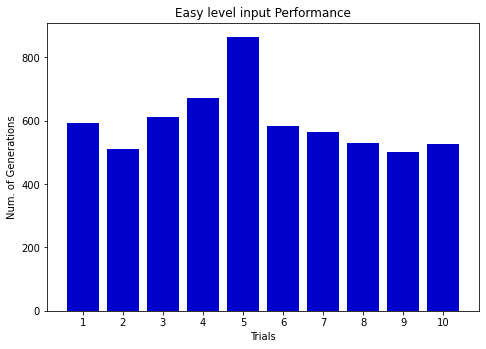

In [391]:
# Easy Input Performance
performance = []
for i in range(10):
  output, numGen = evolutionary_algo(class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable, intial_population_size, num_max_generations,False)
  performance.append(numGen)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
trials = ["1","2","3","4","5","6","7","8","9","10"]
ax.bar(trials,performance,color='mediumblue')
plt.xlabel("Trials")
plt.ylabel("Num. of Generations")
plt.title("Easy level input Performance")
plt.show()

<ipython-input-363-17cbbe07284d>:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent1ResultSecondHalf[j] not in parent1OriginalSecondHalfCopy:
<ipython-input-363-17cbbe07284d>:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent2ResultSecondHalf[l] not in parent2OriginalSecondHalfCopy:


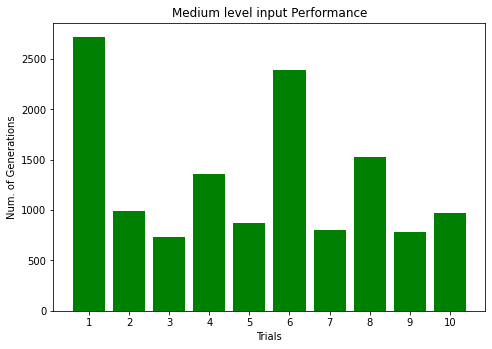

In [371]:
# Medium Input Performance
performance = []
for i in range(10):
  output, numGen = evolutionary_algo(class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable, intial_population_size, num_max_generations,False)
  performance.append(numGen)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
trials = ["1","2","3","4","5","6","7","8","9","10"]
ax.bar(trials,performance,color='green')
plt.xlabel("Trials")
plt.ylabel("Num. of Generations")
plt.title("Medium level input Performance")
plt.show()

<ipython-input-406-17cbbe07284d>:31: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent1ResultSecondHalf[j] not in parent1OriginalSecondHalfCopy:
<ipython-input-406-17cbbe07284d>:41: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if parent2ResultSecondHalf[l] not in parent2OriginalSecondHalfCopy:


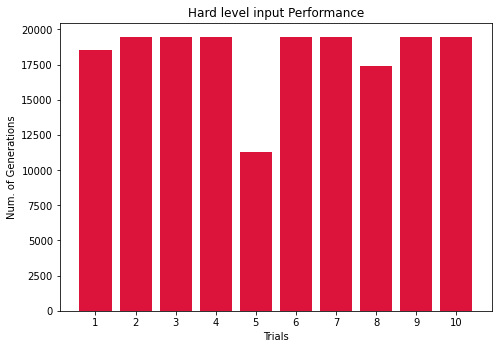

In [411]:
# Hard Input Performance
performance = []
for i in range(10):
  output, numGen = evolutionary_algo(class_subject_hours_dataframe, teacher_subject_dataframe, singleTimetable, intial_population_size, num_max_generations,False)
  performance.append(numGen)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
trials = ["1","2","3","4","5","6","7","8","9","10"]
ax.bar(trials,performance,color='crimson')
plt.xlabel("Trials")
plt.ylabel("Num. of Generations")
plt.title("Hard level input Performance")
plt.show()